<h1>PAIRS TRADING RESEARCH</h1>

<h4>The porpouse of this repository is to research and find the best currencies for pairs trading based on a given historical data</h4>
<quote><i>*If you don't know Pairs Trading yet, please check my Github profile...</i></quote>  <a href=https://github.com/Algo-Tradings> Click Here </a>

<quote><i>**Each process in this research saves an output file. That way you could use it as you wish, or even in another repos of myself.</i></quote>

<h3>1. Run Once </h3> 
install necessary packages.
After that, you need comment the above part of code

In [25]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install python-binance
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install matplotlib

<h3>2. Imports </h3>
get classes of this system

In [34]:
%matplotlib inline
from research import Loader
from research import Cleaner
from research import Correlation
from research import Cointegration
from research import Ratio

<h3>3. Historical Data </h3> 
Select the desired timeframe and interval.

In [27]:

# hist_df = pd.read_csv('./data/raw/historical_data.csv', header=[0, 1], index_col=0) # Uncomment if want last saved historical_data
hist_df = Loader().get_historical_data(timeframe='1d', interval='1 years ago') # To get new data (it takes sometime)
hist_df

BTCUSDT                                ETHUSDT                    \
                Open      High       Low     Close     Open     High      Low   
Time                                                                            
2022-04-06  45497.54  45507.14  43121.00  43170.47  3407.00  3407.50  3162.39   
2022-04-07  43170.47  43900.99  42727.35  43444.19  3168.52  3268.98  3143.15   
2022-04-08  43444.20  43970.62  42107.14  42252.01  3227.20  3314.02  3173.52   
2022-04-09  42252.02  42800.00  42125.48  42753.97  3192.39  3268.40  3181.28   
2022-04-10  42753.96  43410.30  41868.00  42158.85  3258.57  3307.22  3193.00   
...              ...       ...       ...       ...      ...      ...      ...   
2023-04-01  28465.36  28819.71  28220.27  28452.73  1821.52  1842.83  1807.81   
2023-04-02  28452.74  28530.00  27856.43  28171.87  1820.80  1824.81  1771.70   
2023-04-03  28171.87  28500.99  27200.24  27800.00  1794.51  1839.99  1762.77   
2023-04-04  27800.00  28444.44  27662.79  28165.47  1810.51  1891.91  1802.01   
2023-04-05  28165.47  28775.00  27805.10  27988.54  1870.38  1942.98  1864.58   

                    NEOUSDT         ...   IDUSDT          LOOMUSDT           \
              Close    Open   High  ...      Low    Close     Open     High   
Time                                ...                                       
2022-04-06  3168.51   25.74  25.75  ...      NaN      NaN      NaN      NaN   
2022-04-07  3227.19   22.45  23.44  ...      NaN      NaN      NaN      NaN   
2022-04-08  3192.39   23.24  23.52  ...      NaN      NaN      NaN      NaN   
2022-04-09  3258.57   21.83  22.58  ...      NaN      NaN      NaN      NaN   
2022-04-10  3203.04   22.54  22.84  ...      NaN      NaN      NaN      NaN   
...             ...     ...    ...  ...      ...      ...      ...      ...   
2023-04-01  1820.79   12.62  12.65  ...  0.47106  0.48658  0.06609  0.06971   
2023-04-02  1794.51   12.46  12.60  ...  0.45025  0.46685  0.06600  0.06600   
2023-04-03  1810.51   12.12  12.27  ...  0.43210  0.44482  0.06448  0.06678   
2023-04-04  1870.37   11.97  12.11  ...  0.43906  0.46051  0.06397  0.06487   
2023-04-05  1894.66   12.02  12.22  ...  0.45438  0.45705  0.06442  0.06573   

                             OAXUSDT                          
                Low    Close    Open    High     Low   Close  
Time                                                          
2022-04-06      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-07      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-08      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-09      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-10      NaN      NaN     NaN     NaN     NaN     NaN  
...             ...      ...     ...     ...     ...     ...  
2023-04-01  0.06386  0.06600  0.3465  0.3549  0.3200  0.3217  
2023-04-02  0.06408  0.06476  0.3221  0.3225  0.2775  0.2919  
2023-04-03  0.06287  0.06386  0.2921  0.3239  0.2819  0.3010  
2023-04-04  0.06337  0.06442  0.3017  0.3098  0.2859  0.2984  
2023-04-05  0.06401  0.06466  0.2980  0.3308  0.2955  0.3004  

[365 rows x 1180 columns]

<h3>4. Cleaning Data </h3> 

In [28]:
cleared_df = Cleaner().get_cleared_data(hist_df)
cleared_df

,BTCUSDT,ETHUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,IOTAUSDT,XLMUSDT,...,ACAUSDT,XNOUSDT,WOOUSDT,ALPINEUSDT,ASTRUSDT,KDAUSDT,APEUSDT,BSWUSDT,BIFIUSDT,MULTIUSDT
Time,,,,,,,,,,,,,,,,,,,,,
2022-04-06,43170.47,3168.51,22.46,111.70,6.919,1.0520,0.7595,2.426,0.7360,0.2031,...,1.5160,2.468,0.5027,6.4618,0.2095,6.506,10.6597,1.1803,1424.5,18.29
2022-04-07,43444.19,3227.19,23.27,114.10,7.239,1.0890,0.7871,2.503,0.7666,0.2126,...,1.6510,2.507,0.5371,6.5659,0.2363,6.602,11.1757,1.4509,1441.3,15.40
2022-04-08,42252.01,3192.39,21.85,110.70,6.817,1.0240,0.7549,2.380,0.7220,0.2021,...,1.4830,2.418,0.5146,6.2411,0.2327,6.156,10.7797,1.2232,1370.4,14.92
2022-04-09,42753.97,3258.57,22.54,112.70,7.074,1.0450,0.7622,2.417,0.7457,0.2049,...,1.5920,2.440,0.5265,6.3544,0.2655,6.281,10.9757,1.2794,1406.1,14.39
2022-04-10,42158.85,3203.04,21.58,110.30,6.803,1.0270,0.7543,2.361,0.7131,0.2004,...,1.7280,2.465,0.5020,6.1538,0.3086,6.120,12.0711,1.2385,1397.3,13.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,28452.73,1820.79,12.46,92.57,3.135,0.3919,0.5095,1.193,0.2235,0.1082,...,0.0998,0.895,0.2195,2.2622,0.0645,0.996,4.2570,0.1850,497.3,9.31
2023-04-02,28171.87,1794.51,12.11,92.77,3.097,0.3815,0.5180,1.229,0.2158,0.1066,...,0.0968,0.883,0.2083,2.3541,0.0612,0.958,4.1840,0.1817,493.5,9.13
2023-04-03,27800.00,1810.51,11.98,92.97,3.109,0.3872,0.4959,1.175,0.2159,0.1064,...,0.0946,0.860,0.2193,2.2737,0.0620,0.971,4.2620,0.1798,496.1,9.18


<h3>5. Correlated Currencies </h3>
Describe the minimum correlation rate that you expect

In [29]:
corr_df = Correlation().get_log_correlation(cleared_df, min_correlation=0.83)
corr_df

,Currency1,Currency2,Correlation
0,BTCUSDT,ETHUSDT,0.892838
1,BTCUSDT,FUNUSDT,0.849520
2,BTCUSDT,RUNEUSDT,0.836452
3,BTCUSDT,GNOUSDT,0.849898
4,ETHUSDT,FUNUSDT,0.874274
...,...,...,...
78,ALICEUSDT,BAKEUSDT,0.847065
79,TLMUSDT,BAKEUSDT,0.848980
80,TLMUSDT,SLPUSDT,0.852718
81,WAXPUSDT,POWRUSDT,0.868570


<h3>6. Cointegrated Currencies </h3>

In [30]:
coint_df = Cointegration().get_cointegration(corr_df, cleared_df)
coint_df

,Currency1,Currency2,Correlation,Cointegration,Criticals
21,IOTAUSDT,ENJUSDT,0.859613,-4.908489,-3.926781
24,IOTAUSDT,ZENUSDT,0.836445,-4.533703,-3.926781
35,THETAUSDT,ALICEUSDT,0.851847,-4.092679,-3.926781
37,THETAUSDT,BAKEUSDT,0.831229,-5.449098,-3.926781
48,ENJUSDT,WAXPUSDT,0.846966,-5.516323,-3.926781
54,IOTXUSDT,ALICEUSDT,0.845690,-3.975100,-3.926781
55,IOTXUSDT,TLMUSDT,0.842296,-4.836446,-3.926781
61,STMXUSDT,WAXPUSDT,0.841356,-7.131387,-3.926781
63,COMPUSDT,AAVEUSDT,0.833171,-4.436363,-3.926781
65,MANAUSDT,SANDUSDT,0.893812,-4.323888,-3.926781


<h3>7.Final Result</h3>
Shows a list of pairs that is potencially profitable and its ratio

In [32]:
researched_df = Ratio().get_ratio(coint_df, cleared_df)
researched_df

,Currency1,Currency2,Correlation,Cointegration,Criticals,Ratio
65,MANAUSDT,SANDUSDT,0.893812,-4.323888,-3.926781,0.850552
21,IOTAUSDT,ENJUSDT,0.859613,-4.908489,-3.926781,0.557832
35,THETAUSDT,ALICEUSDT,0.851847,-4.092679,-3.926781,0.607451
48,ENJUSDT,WAXPUSDT,0.846966,-5.516323,-3.926781,5.487119
54,IOTXUSDT,ALICEUSDT,0.845690,-3.975100,-3.926781,0.015454
55,IOTXUSDT,TLMUSDT,0.842296,-4.836446,-3.926781,1.234685
61,STMXUSDT,WAXPUSDT,0.841356,-7.131387,-3.926781,0.082201
24,IOTAUSDT,ZENUSDT,0.836445,-4.533703,-3.926781,0.019122
63,COMPUSDT,AAVEUSDT,0.833171,-4.436363,-3.926781,0.626478
37,THETAUSDT,BAKEUSDT,0.831229,-5.449098,-3.926781,4.666114


<h3>8. Visualization</h3>
Minimalist because that is not the porpuse of this research notebook

In [42]:
import matplotlib.pyplot as plt
import numpy as np

Linear Cointegration Between Two Currencies Above

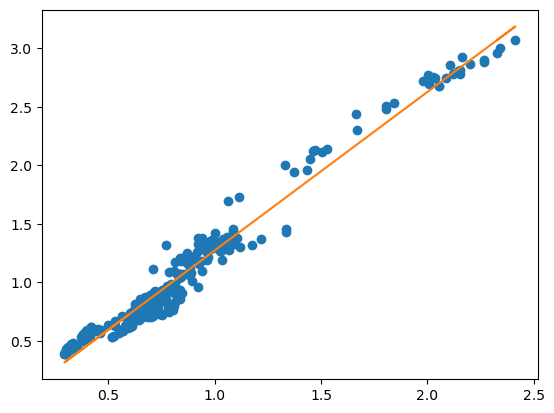

In [41]:
x=cleared_df['MANAUSDT']
y=cleared_df['SANDUSDT']

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

Correlation of same currencies over the time

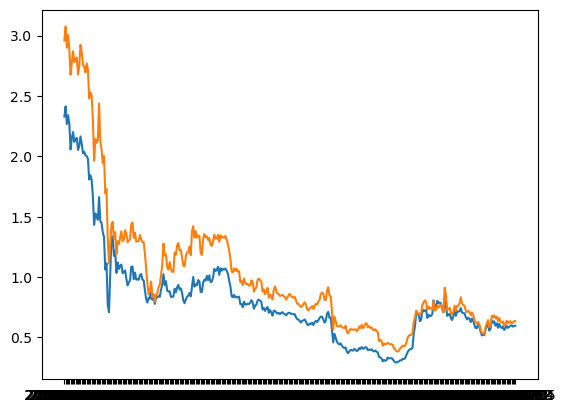

In [45]:
plt.plot(cleared_df.index, x)
plt.plot(cleared_df.index, y)
plt.show()

<h3>9. Considerations</h3>
In this research we clearly saw that some currencies are higly correlated and cointegrated. That way using pairs trading strategy, we have a huge potencial to make consistent profits with them.

<i>If you want full usage of this research, kindly consider visit my others pairs-trading repos.
For that strategy I have a backtester, a dashboard and also a 100% autonomous bot</i>


<h3>Thank you for your time!</h3>